In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, make_scorer, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make sure to import other libraries that will be necessary for training models!

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("Chicago Inspections 2011-2013.csv")

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("Chicago Inspections 2014.csv")

In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

## Visualization

What do inspections look like over time?

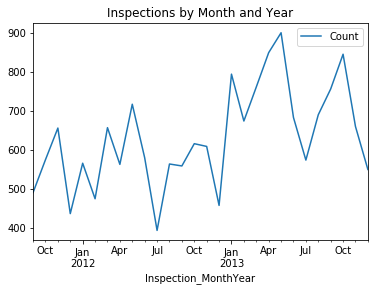

In [7]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

What do the results look like? 

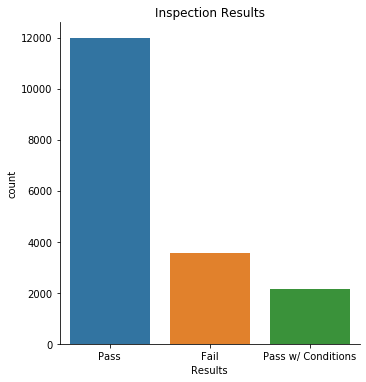

In [8]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

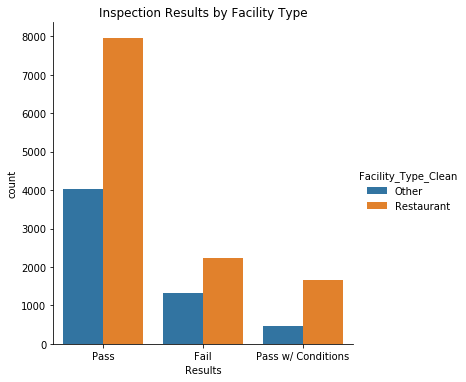

In [9]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

In [10]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [11]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [12]:
X.head()

nspection_ID DBA_Name                                                      
269961        SEVEN STAR                                                0   
507211        PANERA BREAD                                              0   
507212        LITTLE QUIAPO RESTAURANT                                  0   
507216        SERGIO'S TAQUERIA PIZZA INC.                              0   
507219        TARGET STORE # T-2079                                     0   

                                            LICENSE_DESCRIPTION_Limited Business License  \
Inspection_ID DBA_Name                                                                     
269961        SEVEN STAR                                                               0   
507211        PANERA BREAD                                                             0   
507212        LITTLE QUIAPO RESTAURANT                                                 0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                             0   
507219        TARGET STORE # T-2079                                                    0   

                                            LICENSE_DESCRIPTION_Long-Term Care Facility  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            LICENSE_DESCRIPTION_Manufacturing Establishments  \
Inspection_ID DBA_Name                                                                         
269961        SEVEN STAR                                                                   0   
507211        PANERA BREAD                                                                 0   
507212        LITTLE QUIAPO RESTAURANT                                                     0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                                 0   
507219        TARGET STORE # T-2079                                                        0   

                                            LICENSE_DESCRIPTION_Mobile Food License  \
Inspection_ID DBA_Name                                                                
269961        SEVEN STAR                                                          0   
507211        PANERA BREAD                                                        0   
507212        LITTLE QUIAPO RESTAURANT                                            0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                        0   
507219        TARGET STORE # T-2079                                               0   

                                            LICENSE_DESCRIPTION_Motor Vehicle Repair : Engine Only (Class II)  \
Inspection_ID DBA_Name                                                                                          
269961        SEVEN STAR                                                                    0                   
507211        PANERA BREAD                                                                  0                   
507212        LITTLE QUIAPO RESTAURANT                                                      0                   
507216        SERGIO'S TAQUERIA PIZZA INC.                                                  0                   
507219        TARGET STORE # T-2079                                                         0                   

                                            LICENSE_DESCRIPTION_Motor Vehicle Repair: Engine/Body(Class III)  \
Inspection_ID DBA_Name                                              

## Feature Selection:
TBD

In [13]:
X.cov(min_periods=1) #min number of observation per column to get results

320657e-05   
APPLICATION_TYPE_RENEW                                        3.416216e-05   

                                   LICENSE_DESCRIPTION_Outdoor Patio  \
criticalCount                                          -2.549364e-05   
seriousCount                                            1.856992e-05   
minorCount                                              2.305562e-04   
pastFail                                                5.576094e-05   
pastCritical                                           -9.589977e-06   
...                                                              ...   
LICENSE_DESCRIPTION_Wrigley Field                      -2.133002e-07   
APPLICATION_TYPE_C_EXPA                                -1.706402e-07   
APPLICATION_TYPE_C_LOC                                 -3.071523e-07   
APPLICATION_TYPE_ISSUE                                 -1.660329e-05   
APPLICATION_TYPE_RENEW                                  1.708108e-05   

                                   LICENSE_DESCRIPTION_Package Goods  \
criticalCount                                              -0.000072   
seriousCount                                                0.000815   
minorCount                                                 -0.000486   
pastFail                                                    0.000096   
pastCritical                                               -0.000035   
...                                                              ...   
LICENSE_DESCRIPTION_Wrigley Field                          -0.000002   
APPLICATION_TYPE_C_EXPA                                    -0.000002   
APPLICATION_TYPE_C_LOC                                     -0.000003   
APPLICATION_TYPE_ISSUE                                     -0.000174   
APPLICATION_TYPE_RENEW                                      0.000179   

                                   LICENSE_DESCRIPTION_Public Garage  \
criticalCount                                          -5.098728e-05   
seriousCount                                            1.024566e-04   
minorCount                                              3.894862e-06   
pastFail                                                1.115219e-04   
pastCritical                                           -1.917995e-05   
...                                                              ...   
LICENSE_DESCRIPTION_Wrigley Field                      -4.266004e-07   
APPLICATION_TYPE_C_EXPA                                -3.412803e-07   
APPLICATION_TYPE_C_LOC                                 -6.143046e-07   
APPLICATION_TYPE_ISSUE                                 -3.320657e-05   
APPLICATION_TYPE_RENEW                                  3.416216e-05   

                                   LICENSE_DESCRIPTION_Public Place of Amusement  \
criticalCount                                                      -3.824046e-05   
seriousCount                                                       -7.012031e-05   
minorCount                                                          1.172255e-04   
pastFail                                                           -1.433377e-05   
pastCritical                                                       -1.438497e-05   
...                                                                          ...   
LICENSE_DESCRIPTION_Wrigley Field                                  -3.199503e-07   
APPLICATION_TYPE_C_EXPA                                            -2.559602e-07   
APPLICATION_TYPE_C_LOC                                             -4.607284e-07   
APPLICATION_TYPE_ISSUE                                             -2.490493e-05   
APPLICATION_TYPE_RENEW                                              2.562162e-05   

                                   LICENSE_DESCRIPTION_Regulated Business License  \
criticalCount                                                            0.000057   
seriousCount                                                            -0.000178   
minorCount                                      

In [14]:
X.corr(method='pearson', min_periods=1)

-0.006168   
APPLICATION_TYPE_RENEW                                            0.006270   

                                   LICENSE_DESCRIPTION_Outdoor Patio  \
criticalCount                                              -0.004013   
seriousCount                                                0.002389   
minorCount                                                  0.010015   
pastFail                                                    0.018737   
pastCritical                                               -0.002354   
...                                                              ...   
LICENSE_DESCRIPTION_Wrigley Field                          -0.000462   
APPLICATION_TYPE_C_EXPA                                    -0.000413   
APPLICATION_TYPE_C_LOC                                     -0.000555   
APPLICATION_TYPE_ISSUE                                     -0.004361   
APPLICATION_TYPE_RENEW                                      0.004433   

                                   LICENSE_DESCRIPTION_Package Goods  \
criticalCount                                              -0.003487   
seriousCount                                                0.032392   
minorCount                                                 -0.006516   
pastFail                                                    0.009921   
pastCritical                                               -0.002682   
...                                                              ...   
LICENSE_DESCRIPTION_Wrigley Field                          -0.001499   
APPLICATION_TYPE_C_EXPA                                    -0.001340   
APPLICATION_TYPE_C_LOC                                     -0.001799   
APPLICATION_TYPE_ISSUE                                     -0.014141   
APPLICATION_TYPE_RENEW                                      0.014374   

                                   LICENSE_DESCRIPTION_Public Garage  \
criticalCount                                              -0.005675   
seriousCount                                                0.009319   
minorCount                                                  0.000120   
pastFail                                                    0.026500   
pastCritical                                               -0.003329   
...                                                              ...   
LICENSE_DESCRIPTION_Wrigley Field                          -0.000654   
APPLICATION_TYPE_C_EXPA                                    -0.000585   
APPLICATION_TYPE_C_LOC                                     -0.000785   
APPLICATION_TYPE_ISSUE                                     -0.006168   
APPLICATION_TYPE_RENEW                                      0.006270   

                                   LICENSE_DESCRIPTION_Public Place of Amusement  \
criticalCount                                                          -0.004915   
seriousCount                                                           -0.007365   
minorCount                                                              0.004158   
pastFail                                                               -0.003933   
pastCritical                                                           -0.002883   
...                                                                          ...   
LICENSE_DESCRIPTION_Wrigley Field                                      -0.000566   
APPLICATION_TYPE_C_EXPA                                                -0.000506   
APPLICATION_TYPE_C_LOC                                                 -0.000680   
APPLICATION_TYPE_ISSUE                                                 -0.005342   
APPLICATION_TYPE_RENEW                                                  0.005430   

                                   LICENSE_DESCRIPTION_Regulated Business License  \
criticalCount                                                            0.003191   
seriousCount                                                            -0.008100   
minorCount                                       

In [15]:
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
X.drop(to_drop, axis=1, inplace=True)

In [16]:
X.shape

(15311, 2031)

## Data Splitting

Here we split our data into train, validation, and test set. **(We might remove this section)**

In [17]:
#We might remove this section.
# Set seed
np.random.seed(10)

X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size = .80, test_size = .20)


## Fit Models

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

### Model 1 - Support Vector Machine
The first model we will utilize is a Support Vector Machine. SVM is a non-parametric method that looks for the "best separating hyperplane" between two classes.

In [ ]:
# support vector machine

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# create SVM model
svm = SVC()

param_grid = {'C': [0.01, 0.1, 1], 
              'gamma': [0.001, 0.01, 0.1], 
              'kernel': ['rbf']}

svm_grid = GridSearchCV(SVC(), param_grid, cv=5, iid=False)
svm_grid.fit(X, y)
best_index = np.argmax(svm_grid.cv_results_["mean_test_score"])
best_svm_pred = svm_grid.best_estimator_.predict(X)

print(svm_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_svm_pred, y.ravel()))

# validation metrics
cv_scores = cross_val_score(svm_grid.best_estimator_, X, y, cv=5)
print(cv_scores)

In [ ]:
# confusion matrix to visualize SVM predictions

cf_matrix = confusion_matrix(y, best_svm_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Model 2

In [21]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

features = X.to_numpy() #dataframe to matrix

cart = DecisionTreeClassifier() #classification regression tree
parameters = {'min_samples_leaf': [5],#@ least five samples to make a leaf. 
                'ccp_alpha': np.linspace(0, 0.1, 5)}
search_cv = GridSearchCV(cart, parameters, n_jobs=-1, cv=5, verbose=3).fit(features, y) # tell us which hyperparameters are the best performance
best_index = np.argmax(search_cv.cv_results_['mean_test_score'])
print('Best parameters: ', search_cv.cv_results_['params'][best_index])

cart = DecisionTreeClassifier(**search_cv.cv_results_['params'][best_index]).fit(features, y)

accuracy_scorer = make_scorer(accuracy_score)
f1_scorer = make_scorer(f1_score)
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)
scorers = {'accuracy': accuracy_scorer, 'f1': f1_scorer, 'precision': precision_scorer, 'recall': recall_scorer}
for scorer in scorers:
    cv_scores = cross_val_score(cart, X, y, cv=5, scoring=scorer)
    print(scorer, np.mean(cv_scores))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   21.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   24.0s finished
Best parameters:  {'ccp_alpha': 0.025, 'min_samples_leaf': 5}
accuracy 0.9218861986675204
f1 0.8315568279494039
precision 0.7359607860700776
recall 0.9565975882886709


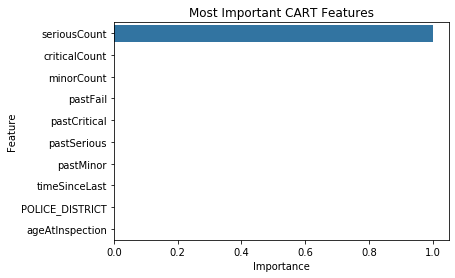

In [19]:
# feature important
cart_data = pd.concat([pd.DataFrame(X.columns), pd.Series(cart.feature_importances_)], axis=1)
cart_data.columns = ['Feature', 'Importance']

sns.barplot(x="Importance", y="Feature", data=cart_data.nlargest(10, 'Importance')).set_title("Most Important CART Features")
plt.show()

## Model 3

In [20]:
#Logistic Regression
# create a model
logit_reg = LogisticRegression(max_iter=1000)

param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
               'fit_intercept': ['True', 'False'],
             'solver': ['liblinear', 'saga']}

logit_grid = GridSearchCV(logit_reg, param_grid, cv=5, iid=False)
logit_grid.fit(X, y)
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X)

print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y.ravel()))


cv_scores = cross_val_score(logit_grid.best_estimator_, X, y, cv=5)
print(cv_scores)


{'C': 0.1, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Validation Accuracy 0.9246946639670824
[0.92262488 0.91606793 0.91410843 0.93011104 0.92815153]


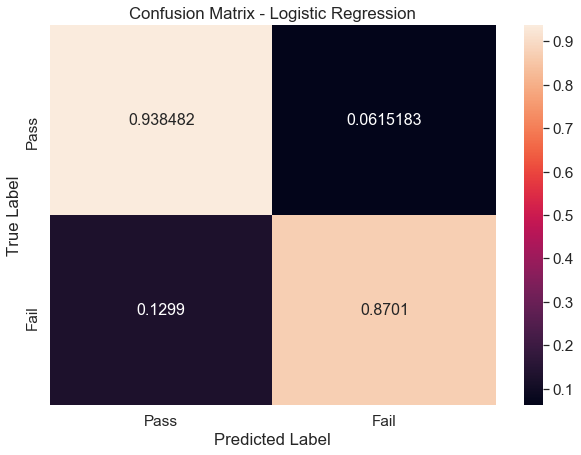

In [22]:
#Confusion Matrix to Visualize the Predictions



cf_matrix = confusion_matrix(y, best_logit_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

## Policy Simulation

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

### Coefficients with the largest absolute value: 
TBD

In [23]:
#Dataframe with the features and the logit coefficients 
logit_data = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logit_grid.best_estimator_.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

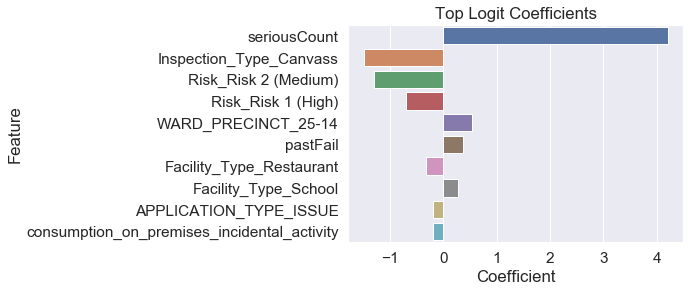

In [24]:
#Plotting the 10 coefficients with the largest absolute value
sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

### Predict on Data with Unseen Labels

In [25]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & ....columns]

AttributeError: 'ellipsis' object has no attribute 'columns'